# 1. Make models that classify Dogs and Cats


In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

# Cat definition -> use for labeling 
def is_cat(x): return x[0].isupper() 

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

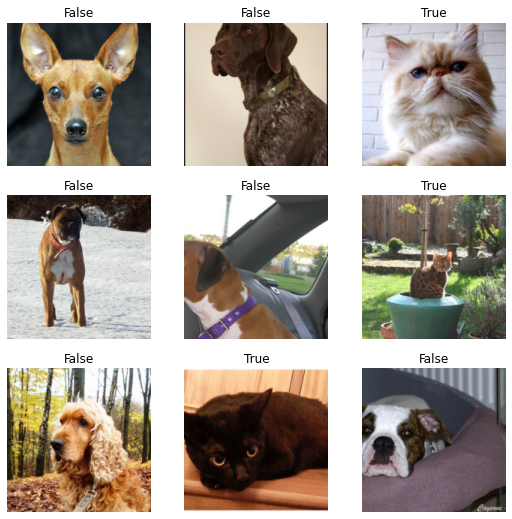

In [4]:
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.186156,0.050782,0.018268,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.075232,0.054530,0.014885,00:51
1,0.045136,0.020468,0.008796,00:52
2,0.022235,0.016392,0.007442,00:51


In [7]:
# We save it as pkl file -> frozen object 
learn.export('model.pkl')

In [8]:
learn = load_learner('model.pkl')

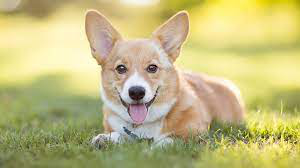

In [17]:
image_path = '/content/dog.jpeg'
im1 = PILImage.create('dog.jpeg')
im1.to_thumb(300)

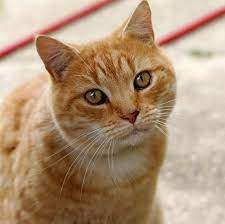

In [19]:
image_path = '/content/cat.jpeg'
im2 = PILImage.create('cat.jpeg')
im2.to_thumb(300)

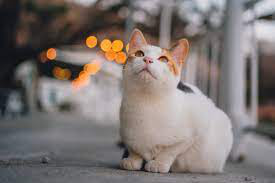

In [31]:
image_path = '/content/jinny.jpeg'
im2 = PILImage.create('jinny.jpeg')
im2.to_thumb(300)

In [20]:
# Predict the dog image if the image is cat or dog
learn.predict(im1)

('False', TensorBase(0), TensorBase([1.0000e+00, 6.1111e-07]))

In [21]:
# Predict the cat image if the image is cat or dog
learn.predict(im2)

('True', TensorBase(1), TensorBase([6.1428e-16, 1.0000e+00]))

In [22]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 KB 27.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━

In [23]:
import gradio as gr
categories = ('Dog', 'Cat')

# This function returns the prediction of dog or cat and also provides probs
def classify_image(img):
  pred, idx, probs = learn.predict(img)
  return dict(zip(categories, map(float,probs)))

In [25]:
# test the def above with dog image
classify_image(im1)

{'Dog': 0.9999994039535522, 'Cat': 6.111118295848428e-07}

In [26]:
# test the def above with cat image
classify_image(im2)

{'Dog': 6.142821635133299e-16, 'Cat': 1.0}

# 2. Creating Gradio Interface

In [34]:
image = gr.inputs.Image(shape = (192,192))
label = gr.outputs.Label()
examples = ['dog.jpeg', 'cat.jpeg', 'jinny.jpeg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline = False, share = True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cb71d3be-bc19-4c78.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [37]:
m = learn.model

In [38]:
ps = list(m.parameters())

In [39]:
ps[1]

Parameter containing:
tensor([ 2.3313e-01,  2.6564e-01, -5.1096e-08,  5.1833e-01,  3.4404e-09,
         2.2162e-01,  4.2330e-01,  1.3153e-07,  2.5092e-01,  1.5152e-06,
         3.1737e-01,  2.5015e-01,  3.7916e-01,  1.0862e-05,  2.7442e-01,
         2.3802e-01,  2.3967e-01,  3.9529e-01,  4.6999e-01,  2.9179e-01,
         2.7061e-01,  2.7878e-01,  2.9043e-01,  2.0557e-01,  2.5873e-01,
         2.7871e-01,  2.9242e-01,  3.1607e-01,  3.8779e-01,  3.0430e-01,
         2.6672e-01,  2.1069e-01,  2.8800e-01,  3.3250e-01,  4.2691e-01,
         3.7268e-01,  7.4804e-08,  1.9087e-01,  1.4740e-08,  2.2338e-01,
         1.7914e-01,  2.4867e-01,  2.7226e-01,  2.6064e-01,  2.9536e-01,
         2.9920e-01,  2.2335e-01,  2.6456e-01,  2.2001e-08,  2.6551e-01,
         2.2117e-01,  2.8381e-01,  3.3025e-01,  2.2717e-01,  3.6517e-01,
         2.1257e-01,  2.3888e-01,  2.4984e-01,  5.2512e-01,  2.4862e-01,
         2.9448e-01,  2.5789e-01,  4.8280e-01,  2.6470e-01],
       requires_grad=True)

In [42]:
!pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.7 MB/s eta 0:00:00
